<a href="https://colab.research.google.com/github/jackmwallace/DS1002/blob/main/Words_HW_Jack_Wallace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

['a', 'aa', 'aal', 'aalii', 'aam', 'aani', 'aardvark', 'aardwolf', 'aaron']
Number of words beginning with a: 16982
Number of words with q in them: 3624
Fraction of words without an e: 76966/234450


['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']




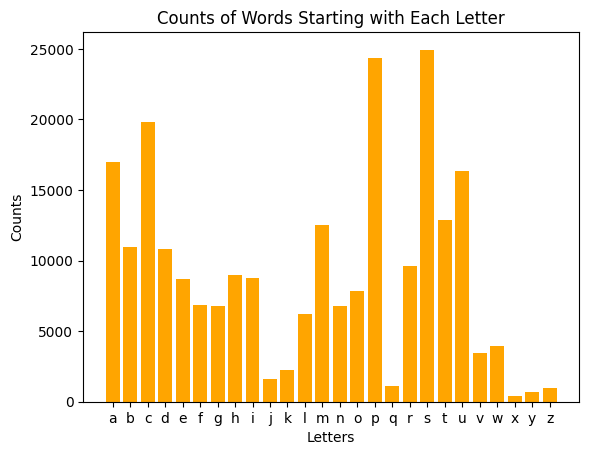



['antidisestablishmentarianism', 'formaldehydesulphoxylate', 'pathologicopsychological', 'scientificophilosophical', 'tetraiodophenolphthalein']




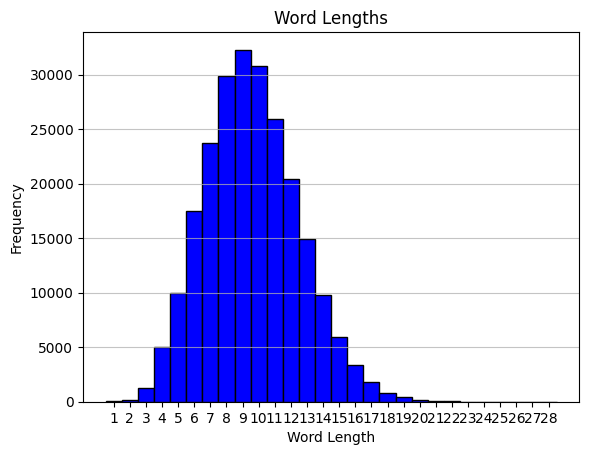


Number of words containing both 'v' and 'a': 11347
Number of words containing both 'w' and 'l': 4822

The most common pair of letters: er appeared 42349 times.
The least common pair of letters: jw appeared 1 times.


In [16]:
!pip install english_words
from english_words import get_english_words_set
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

words = get_english_words_set(['web2'], lower=True)
words = list(words)
alpha_list = sorted(words)
print(alpha_list[0:9])

count = 0;
for word in alpha_list:
    if word.startswith('a'):
      count += 1;
print("Number of words beginning with a: "+str(count))
count = 0;
for word in alpha_list:
    if word.count('q') >= 1:
      count += 1;
print("Number of words with q in them: "+str(count))
count = 0;
for word in alpha_list:
    if word.count('e') == 0:
      count += 1;
print("Fraction of words without an e: "+str(count)+"/"+str(len(alpha_list)))
alpha = np.asarray(alpha_list)

alphabet = [chr(i) for i in range(ord('a'),ord('z')+1)]
print("\n")
print(alphabet)
print("\n")

def count_words_starting_with_each_letter(words):
    # Create count array of the correct size
    counts = np.zeros(26, dtype=int)

    # Iterate through words
    for word in words:
        # Get the first letter and convert to lowercase
        first_letter = word[0].lower()

        # Check if the first character is an alphabet
        if first_letter.isalpha():
            # Calculate the index of the letter in the counts array
            index = ord(first_letter) - ord('a')

            # Add to the counting array
            counts[index] += 1

    return counts

counts = count_words_starting_with_each_letter(words)
x = np.arange(len(alphabet))

plt.bar(x, counts, color='orange')
plt.xlabel('Letters')
plt.ylabel('Counts')
plt.title('Counts of Words Starting with Each Letter')
plt.xticks(x, alphabet)
plt.show()

print("\n")
len_list = sorted(alpha, key=len, reverse=True)
print(len_list[0:5])
print("\n")

# Count the length of each word and store it in a list
word_lengths = [len(word) for word in words]

# Create a histogram of word lengths
plt.hist(word_lengths, bins=np.arange(1, max(word_lengths) + 2), align='left', color='blue', edgecolor='black')

# Set labels and title
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Word Lengths')

# Set x-axis ticks
plt.xticks(np.arange(1, max(word_lengths) + 1))

# Display the histogram
plt.grid(axis='y', alpha=0.75)
plt.show()

# Initialize counter
count_va = 0
count_wl = 0

# Iterate through each word in the array
for word in words:
    # Check if both "v" and "a" are present in the word
    if 'v' in word and 'a' in word:
        count_va += 1

# Iterate through each word in the array
for word in words:
    # Check if both "v" and "a" are present in the word
    if 'w' in word and 'l' in word:
        count_wl += 1

# Print the count
print("\nNumber of words containing both 'v' and 'a':", count_va)
print("Number of words containing both 'w' and 'l':", count_wl)

# Initialize dictionary to store pairs of letters and their counts
pair_counts = Counter()

# Iterate through each word in the array
for word in words:
    # Generate all possible pairs of letters from the word
    word_pairs = [word[i:i+2] for i in range(len(word) - 1)]

    # Update the counts of pairs in the dictionary
    pair_counts.update(word_pairs)

# Find the least common pair of letters
least_common_pair = min(pair_counts, key=pair_counts.get)

# Find the most common pair of letters
most_common_pair = pair_counts.most_common(1)[0]

# Print the most common pair
print("\nThe most common pair of letters:", most_common_pair[0], "appeared", most_common_pair[1], "times.")
# Print the least common pair
print("The least common pair of letters:", least_common_pair, "appeared", pair_counts[least_common_pair], "times.")

The words printed out before alphabetizing the list seem to have no sorted quality whatsoever. The alphabet line creates a list with every letter of the alphabet as a value at different points. The most common word length is 9. It takes 10 seconds to run the code on the whole. Professor Abrams mentioned in lecture that we could use dictionaries to make our lives easier and more efficient, so the trip up on the bonus came with how to actually generate all of these different pairs to test, but was able to find a method on StackOverflow.